# Градиентный спуск с постоянным шагом

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from Functions.functions_under_study import f_well, f_poor, f_rozen, grad_well, grad_poor, grad_rozen
from Functions.optimization import const_step_grad_descent

In [3]:
func_names = [f_well, f_poor, f_rozen]
grad_names = [grad_well, grad_poor, grad_rozen]
func_labels = ['Well-conditioned',
               'Poorly-conditioned',
               'Rosenbrock']

N_FUNC = len(func_names)

In [4]:
N_LR = 5
lr_classic_grad_descent = np.empty((N_FUNC, N_LR), dtype=object)

for ndx, lbl in enumerate(func_labels):
    
    match lbl:
        case 'Well-conditioned':
            for mdx in range(N_LR):
                lr_classic_grad_descent[ndx,mdx] = np.array([1/10**(mdx+1)] * 2)
        case 'Poorly-conditioned':
            lr_classic_grad_descent[ndx,0] = np.array([0.00010] * 2)
            lr_classic_grad_descent[ndx,1] = np.array([0.00008] * 2)
            lr_classic_grad_descent[ndx,2] = np.array([0.00006] * 2)
            lr_classic_grad_descent[ndx,3] = np.array([0.00004] * 2)
            lr_classic_grad_descent[ndx,4] = np.array([0.00002] * 2)
        case 'Rosenbrock':
            lr_classic_grad_descent[ndx,0] = np.array([0.00010] * 2)
            lr_classic_grad_descent[ndx,1] = np.array([0.00008] * 2)
            lr_classic_grad_descent[ndx,2] = np.array([0.00006] * 2)
            lr_classic_grad_descent[ndx,3] = np.array([0.00004] * 2)
            lr_classic_grad_descent[ndx,4] = np.array([0.00002] * 2)

for ndx, lbl in enumerate(func_labels):
    print(lbl)
    for lr in lr_classic_grad_descent[ndx,:]:
        print(lr)

Well-conditioned
[0.1 0.1]
[0.01 0.01]
[0.001 0.001]
[0.0001 0.0001]
[1.e-05 1.e-05]
Poorly-conditioned
[0.0001 0.0001]
[8.e-05 8.e-05]
[6.e-05 6.e-05]
[4.e-05 4.e-05]
[2.e-05 2.e-05]
Rosenbrock
[0.0001 0.0001]
[8.e-05 8.e-05]
[6.e-05 6.e-05]
[4.e-05 4.e-05]
[2.e-05 2.e-05]


In [5]:
N_EPS = 5
EPS_INIT = -1
eps_var = np.logspace(EPS_INIT, EPS_INIT-N_EPS+1, N_EPS)
print(eps_var)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]


In [6]:
x0_optim_arr     = np.empty((N_FUNC, N_LR), dtype='object')
x1_optim_arr     = np.empty((N_FUNC, N_LR), dtype='object')
iter_counter_arr = np.empty((N_FUNC, N_LR), dtype='object')
func_counter_arr = np.empty((N_FUNC, N_LR), dtype='object')
grad_counter_arr = np.empty((N_FUNC, N_LR), dtype='object')

# Начальное приближение.
x_init = np.array([-2.2, -2.2])

for ndx, func, grad in zip(range(N_FUNC), func_names, grad_names):
    for mdx, lr in enumerate(lr_classic_grad_descent[ndx,:]):
        x0_optim_list     = []
        x1_optim_list     = []
        iter_counter_list = []
        func_counter_list = []
        grad_counter_list = []
    
        for eps in eps_var:
            x_optim, _, iter_final, func_counter, grad_counter = const_step_grad_descent(
                loss_func=func,
                grad_func=grad,
                x_init=x_init,
                learning_rate=lr,
                tolerance=eps,
                printoutput=False
                )
            x0_optim_list.append(x_optim[0])
            x1_optim_list.append(x_optim[1])
            iter_counter_list.append(iter_final)
            func_counter_list.append(func_counter)
            grad_counter_list.append(grad_counter)
                       
        x0_optim_arr[ndx, mdx] = x0_optim_list
        x1_optim_arr[ndx, mdx] = x1_optim_list
        iter_counter_arr[ndx, mdx] = iter_counter_list
        func_counter_arr[ndx, mdx] = func_counter_list
        grad_counter_arr[ndx, mdx] = grad_counter_list

Преобразуем в таблицы.

In [7]:
col_name_arr = np.empty((N_FUNC,), dtype='object')
# Special column names for x_optim.
col_name_x_optim_arr = np.empty((N_FUNC,), dtype='object')

for ndx in range(N_FUNC):
    col_name = []
    col_name_x_optim = []
    for mdx in range(N_LR):
        col_name.append('x1: lr=' + str(lr_classic_grad_descent[ndx,mdx][0]) + ', x2: lr=' + str(lr_classic_grad_descent[ndx,mdx][1]))
        col_name_x_optim.append('x1 (lr=' + str(lr_classic_grad_descent[ndx,mdx][0]) + ')')
        col_name_x_optim.append('x2 (lr=' + str(lr_classic_grad_descent[ndx,mdx][1]) + ')')
    col_name_arr[ndx] = col_name.copy()
    col_name_x_optim_arr[ndx] = col_name_x_optim.copy()
    
x_optim_tbl_set      = np.empty((N_FUNC,), dtype=object)
iter_counter_tbl_set = np.empty((N_FUNC,), dtype=object)
func_counter_tbl_set = np.empty((N_FUNC,), dtype=object)
grad_counter_tbl_set = np.empty((N_FUNC,), dtype=object)

for ndx in range(N_FUNC):
    x_optim_tbl      = eps_var.copy()
    iter_counter_tbl = eps_var.copy()
    func_counter_tbl = eps_var.copy()
    grad_counter_tbl = eps_var.copy()
    
    for idx, colx1, colx2, col_iter, col_func, col_grad in zip(
        range(N_LR),
        x0_optim_arr[ndx, :],
        x1_optim_arr[ndx, :],
        iter_counter_arr[ndx, :],
        func_counter_arr[ndx, :],
        grad_counter_arr[ndx, :]
        ):
        x_optim_tbl      = np.vstack((x_optim_tbl, colx1, colx2))
        iter_counter_tbl = np.vstack((iter_counter_tbl, col_iter))
        func_counter_tbl = np.vstack((func_counter_tbl, col_func))
        grad_counter_tbl = np.vstack((grad_counter_tbl, col_grad))
    
    x_optim_tbl_set[ndx] = pd.DataFrame(x_optim_tbl.T, columns=['eps'] + col_name_x_optim_arr[ndx])

    iter_counter_tbl_set[ndx] = pd.DataFrame(iter_counter_tbl.T, columns=['eps'] + col_name_arr[ndx])
    iter_counter_tbl_set[ndx][col_name_arr[ndx]] = iter_counter_tbl_set[ndx][col_name_arr[ndx]].astype(int)

    func_counter_tbl_set[ndx] = pd.DataFrame(func_counter_tbl.T, columns=['eps'] + col_name_arr[ndx])
    func_counter_tbl_set[ndx][col_name_arr[ndx]] = func_counter_tbl_set[ndx][col_name_arr[ndx]].astype(int)
    
    grad_counter_tbl_set[ndx] = pd.DataFrame(grad_counter_tbl.T, columns=['eps'] + col_name_arr[ndx])
    grad_counter_tbl_set[ndx][col_name_arr[ndx]] = grad_counter_tbl_set[ndx][col_name_arr[ndx]].astype(int)

In [8]:
tables_all = [x_optim_tbl_set, iter_counter_tbl_set, func_counter_tbl_set, grad_counter_tbl_set]
titles_all = [
    'Координаты минимума функции',
    'Количество итераций',
    'Количество вычислений функции',
    'Количество вычислений градиента']

In [9]:
for ttl, tbl in zip(titles_all, tables_all):
    for ndx, lbl in enumerate(func_labels):
        print(ttl + ': ' + lbl)
        display(tbl[ndx])

Координаты минимума функции: Well-conditioned


,eps,x1 (lr=0.1),x2 (lr=0.1),x1 (lr=0.01),x2 (lr=0.01),x1 (lr=0.001),x2 (lr=0.001),x1 (lr=0.0001),x2 (lr=0.0001),x1 (lr=1e-05),x2 (lr=1e-05)
0,0.10000,-0.052657,0.013537,-0.063214,0.010690,-0.064874,0.010308,-0.065051,0.010268,-0.065058,0.010264
1,0.01000,-0.004910,0.001937,-0.006434,0.002375,-0.006517,0.002388,-0.006533,0.002392,-0.006534,0.002392
2,0.00100,-0.000478,0.000197,-0.000629,0.000256,-0.000645,0.000262,-0.000646,0.000262,-0.000646,0.000262
3,0.00010,-0.000055,0.000023,-0.000063,0.000026,-0.000064,0.000027,-0.000064,0.000027,-0.000064,0.000027
4,0.00001,-0.000005,0.000002,-0.000006,0.000003,-0.000006,0.000003,-0.000006,0.000003,-0.000006,0.000003


Координаты минимума функции: Poorly-conditioned


,eps,x1 (lr=0.0001),x2 (lr=0.0001),x1 (lr=8e-05),x2 (lr=8e-05),x1 (lr=6e-05),x2 (lr=6e-05),x1 (lr=4e-05),x2 (lr=4e-05),x1 (lr=2e-05),x2 (lr=2e-05)
0,0.10000,-5.492868,-0.207137,-5.492861,-0.207137,-5.492859,-0.207137,-5.492856,-0.207137,-5.492853,-0.207137
1,0.01000,-5.516819,-0.207727,-5.516818,-0.207727,-5.516818,-0.207727,-5.516818,-0.207727,-5.516818,-0.207727
2,0.00100,-5.519214,-0.207786,-5.519214,-0.207786,-5.519214,-0.207786,-5.519214,-0.207786,-5.519214,-0.207786
3,0.00010,-5.519454,-0.207792,-5.519454,-0.207792,-5.519454,-0.207792,-5.519454,-0.207792,-5.519454,-0.207792
4,0.00001,-5.519478,-0.207792,-5.519478,-0.207792,-5.519478,-0.207792,-5.519478,-0.207792,-5.519478,-0.207792


Координаты минимума функции: Rosenbrock


,eps,x1 (lr=0.0001),x2 (lr=0.0001),x1 (lr=8e-05),x2 (lr=8e-05),x1 (lr=6e-05),x2 (lr=6e-05),x1 (lr=4e-05),x2 (lr=4e-05),x1 (lr=2e-05),x2 (lr=2e-05)
0,0.10000,0.897287,0.804687,0.897286,0.804686,0.897285,0.804684,0.897285,0.804683,0.897283,0.804680
1,0.01000,0.988919,0.977917,0.988919,0.977917,0.988919,0.977916,0.988919,0.977916,0.988919,0.977916
2,0.00100,0.998883,0.997763,0.998883,0.997763,0.998883,0.997763,0.998883,0.997763,0.998883,0.997763
3,0.00010,0.999888,0.999776,0.999888,0.999776,0.999888,0.999776,0.999888,0.999776,0.999888,0.999776
4,0.00001,0.999989,0.999978,0.999989,0.999978,0.999989,0.999978,0.999989,0.999978,0.999989,0.999978


Количество итераций: Well-conditioned


,eps,"x1: lr=0.1, x2: lr=0.1","x1: lr=0.01, x2: lr=0.01","x1: lr=0.001, x2: lr=0.001","x1: lr=0.0001, x2: lr=0.0001","x1: lr=1e-05, x2: lr=1e-05"
0,0.10000,20,204,2038,20377,203777
1,0.01000,35,357,3585,35857,358576
2,0.00100,50,517,5187,51890,518922
3,0.00010,64,676,6791,67942,679451
4,0.00001,79,835,8395,83994,839985


Количество итераций: Poorly-conditioned


,eps,"x1: lr=0.0001, x2: lr=0.0001","x1: lr=8e-05, x2: lr=8e-05","x1: lr=6e-05, x2: lr=6e-05","x1: lr=4e-05, x2: lr=4e-05","x1: lr=2e-05, x2: lr=2e-05"
0,0.10000,12813,16016,21355,32033,64067
1,0.01000,18945,23682,31577,47367,94735
2,0.00100,25078,31349,41799,62700,125404
3,0.00010,31211,39015,52021,78034,156072
4,0.00001,37344,46681,62243,93368,186741


Количество итераций: Rosenbrock


,eps,"x1: lr=0.0001, x2: lr=0.0001","x1: lr=8e-05, x2: lr=8e-05","x1: lr=6e-05, x2: lr=6e-05","x1: lr=4e-05, x2: lr=4e-05","x1: lr=2e-05, x2: lr=2e-05"
0,0.10000,31161,38957,51950,77936,155892
1,0.01000,83357,104202,138944,208427,416875
2,0.00100,140415,175525,234041,351073,702169
3,0.00010,198010,247519,330034,495063,990150
4,0.00001,255660,319581,426117,639189,1278403


Количество вычислений функции: Well-conditioned


,eps,"x1: lr=0.1, x2: lr=0.1","x1: lr=0.01, x2: lr=0.01","x1: lr=0.001, x2: lr=0.001","x1: lr=0.0001, x2: lr=0.0001","x1: lr=1e-05, x2: lr=1e-05"
0,0.10000,0,0,0,0,0
1,0.01000,0,0,0,0,0
2,0.00100,0,0,0,0,0
3,0.00010,0,0,0,0,0
4,0.00001,0,0,0,0,0


Количество вычислений функции: Poorly-conditioned


,eps,"x1: lr=0.0001, x2: lr=0.0001","x1: lr=8e-05, x2: lr=8e-05","x1: lr=6e-05, x2: lr=6e-05","x1: lr=4e-05, x2: lr=4e-05","x1: lr=2e-05, x2: lr=2e-05"
0,0.10000,0,0,0,0,0
1,0.01000,0,0,0,0,0
2,0.00100,0,0,0,0,0
3,0.00010,0,0,0,0,0
4,0.00001,0,0,0,0,0


Количество вычислений функции: Rosenbrock


,eps,"x1: lr=0.0001, x2: lr=0.0001","x1: lr=8e-05, x2: lr=8e-05","x1: lr=6e-05, x2: lr=6e-05","x1: lr=4e-05, x2: lr=4e-05","x1: lr=2e-05, x2: lr=2e-05"
0,0.10000,0,0,0,0,0
1,0.01000,0,0,0,0,0
2,0.00100,0,0,0,0,0
3,0.00010,0,0,0,0,0
4,0.00001,0,0,0,0,0


Количество вычислений градиента: Well-conditioned


,eps,"x1: lr=0.1, x2: lr=0.1","x1: lr=0.01, x2: lr=0.01","x1: lr=0.001, x2: lr=0.001","x1: lr=0.0001, x2: lr=0.0001","x1: lr=1e-05, x2: lr=1e-05"
0,0.10000,20,204,2038,20377,203777
1,0.01000,35,357,3585,35857,358576
2,0.00100,50,517,5187,51890,518922
3,0.00010,64,676,6791,67942,679451
4,0.00001,79,835,8395,83994,839985


Количество вычислений градиента: Poorly-conditioned


,eps,"x1: lr=0.0001, x2: lr=0.0001","x1: lr=8e-05, x2: lr=8e-05","x1: lr=6e-05, x2: lr=6e-05","x1: lr=4e-05, x2: lr=4e-05","x1: lr=2e-05, x2: lr=2e-05"
0,0.10000,12813,16016,21355,32033,64067
1,0.01000,18945,23682,31577,47367,94735
2,0.00100,25078,31349,41799,62700,125404
3,0.00010,31211,39015,52021,78034,156072
4,0.00001,37344,46681,62243,93368,186741


Количество вычислений градиента: Rosenbrock


,eps,"x1: lr=0.0001, x2: lr=0.0001","x1: lr=8e-05, x2: lr=8e-05","x1: lr=6e-05, x2: lr=6e-05","x1: lr=4e-05, x2: lr=4e-05","x1: lr=2e-05, x2: lr=2e-05"
0,0.10000,31161,38957,51950,77936,155892
1,0.01000,83357,104202,138944,208427,416875
2,0.00100,140415,175525,234041,351073,702169
3,0.00010,198010,247519,330034,495063,990150
4,0.00001,255660,319581,426117,639189,1278403


# Графики

In [10]:
user_figsize = (12, 6)
user_fontsize = 16
user_markersize = 12

## Координаты минимума функции

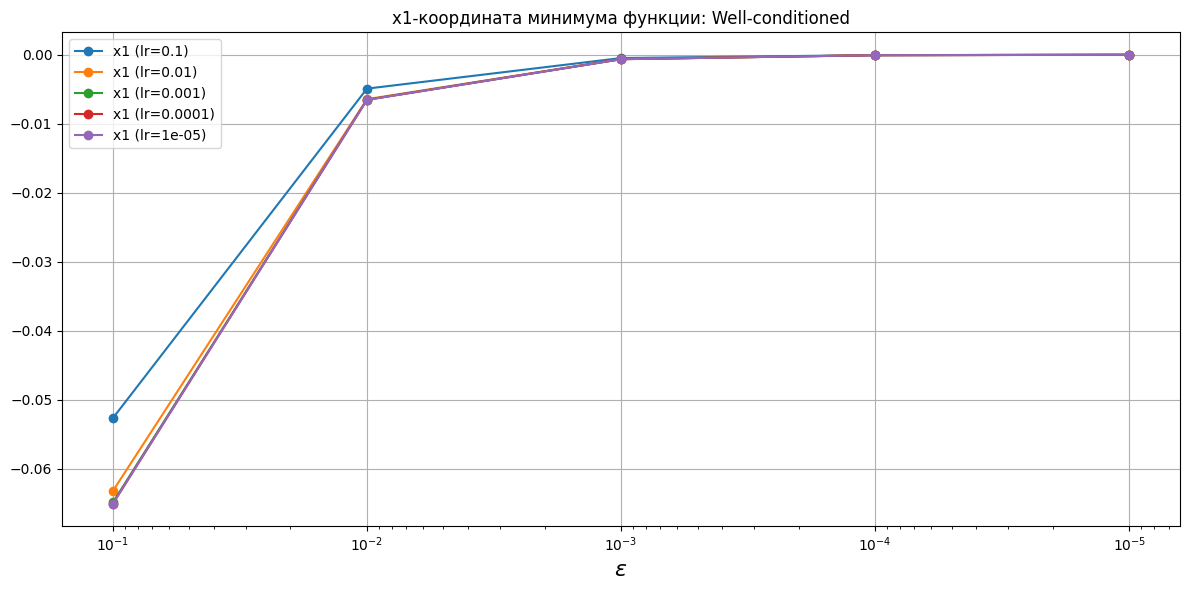

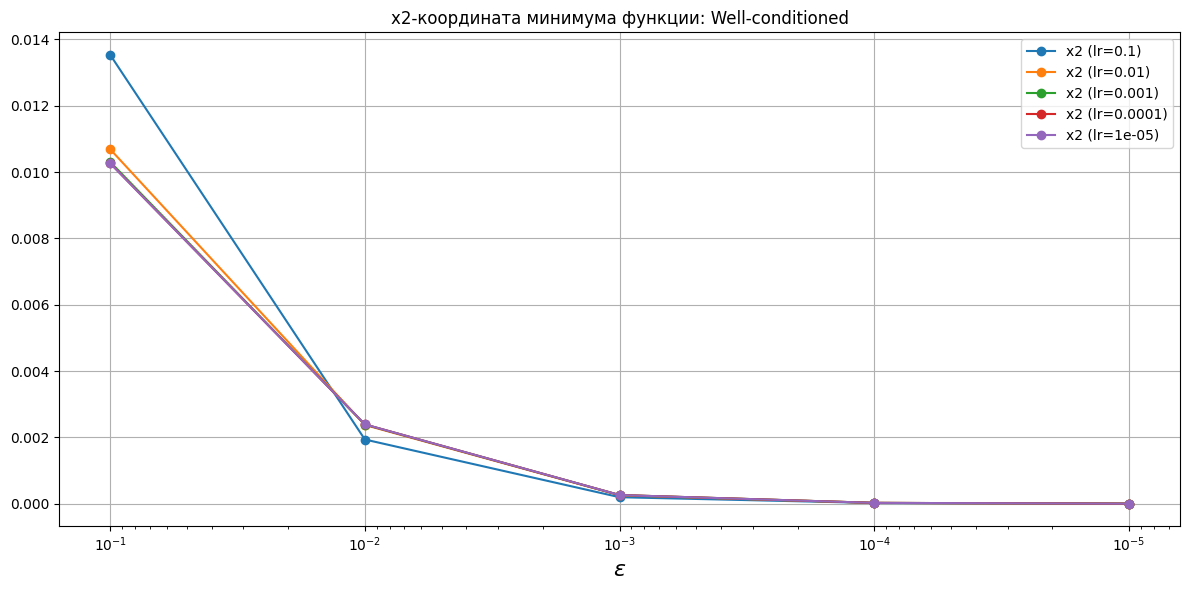

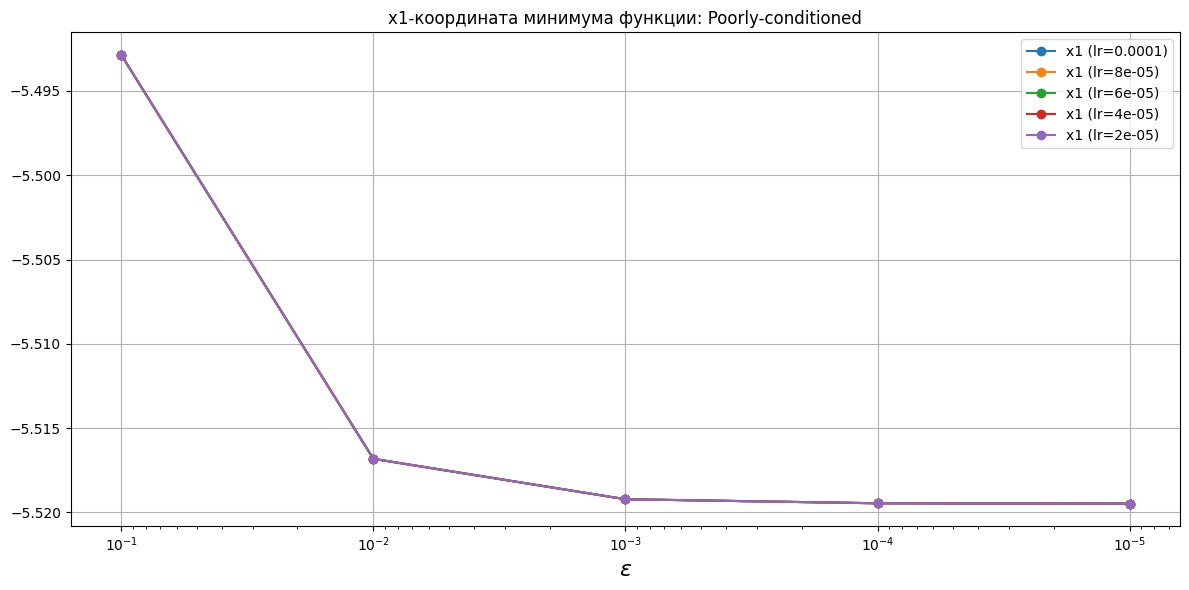

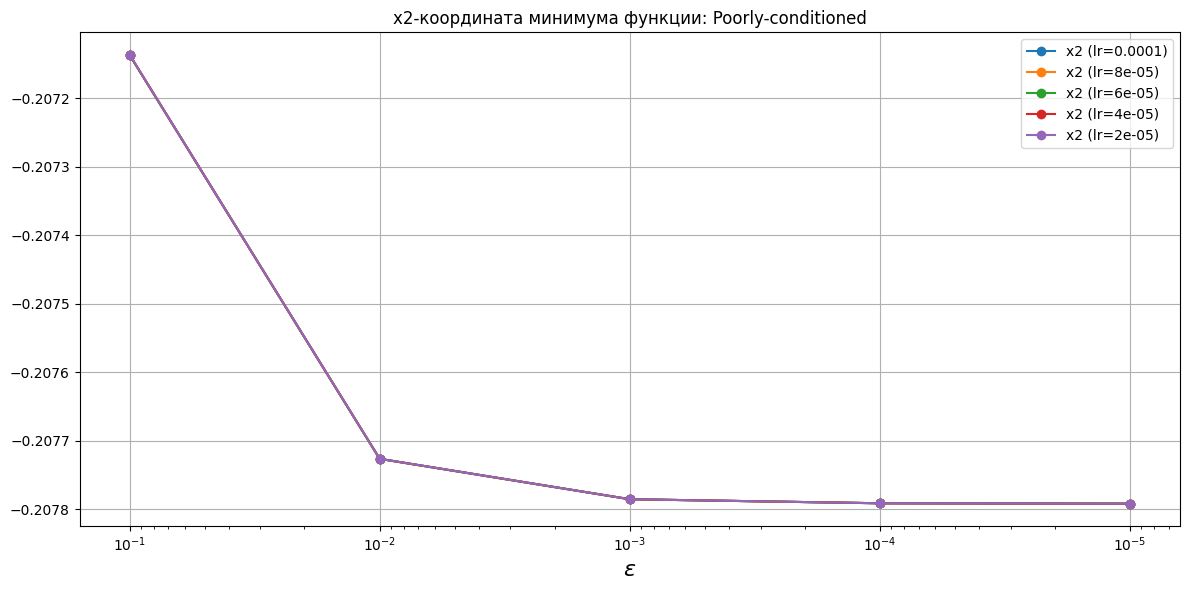

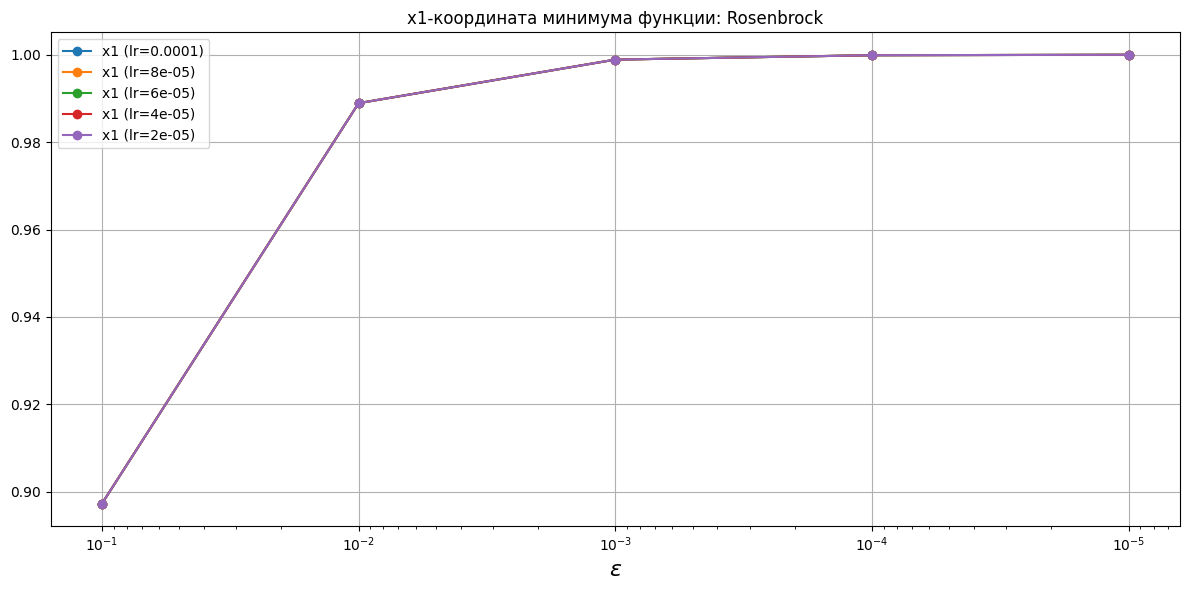

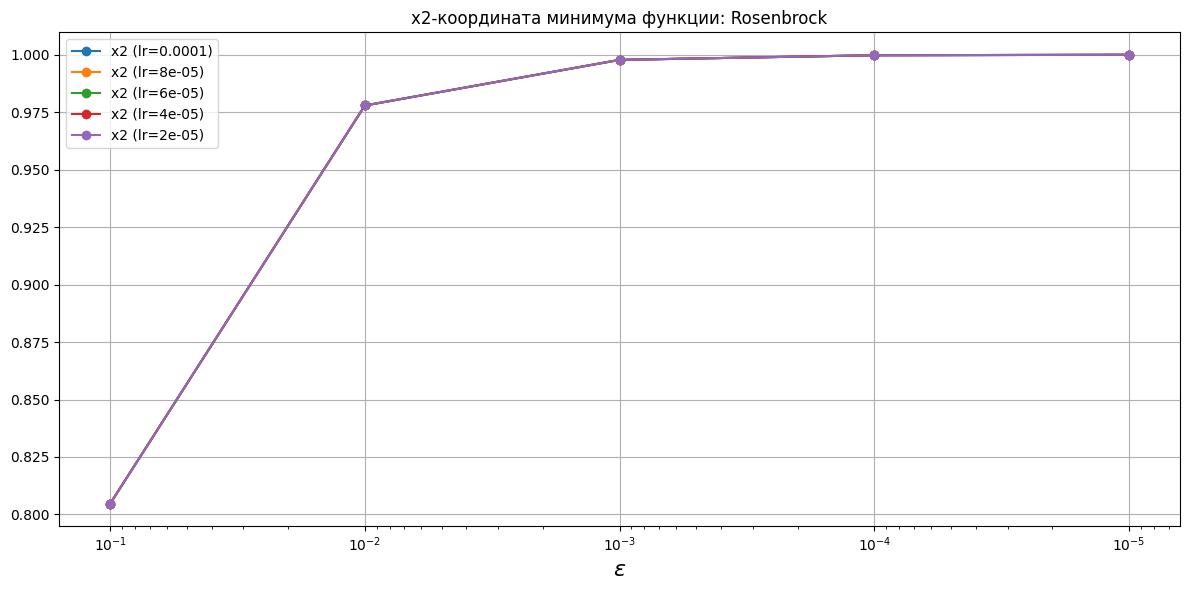

In [11]:
for ndx, lbl in enumerate(func_labels):
    for idx in range(2):
        plt.figure(figsize=user_figsize)
        for mdx in range(N_LR):
            plt.plot(x_optim_tbl_set[ndx]['eps'],
                    x_optim_tbl_set[ndx].iloc[:,(1+idx)+2*mdx],
                    marker='.', markersize=user_markersize,
                    label=x_optim_tbl_set[ndx].iloc[:,(1+idx)+2*mdx].name)
        plt.gca().invert_xaxis()
        plt.title('x' + str(idx+1) + '-координата минимума функции: ' + lbl)
        plt.grid()
        plt.xscale('log')
        plt.xlabel('$\epsilon$', fontsize=user_fontsize)
        plt.legend()
        plt.tight_layout()
        plt.savefig('readme_img/const_step_descent_img/' + 'x' + str(idx+1) + '_optim_' + lbl + '.png', bbox_inches='tight')
        plt.show()

## Количество итераций и вычислений

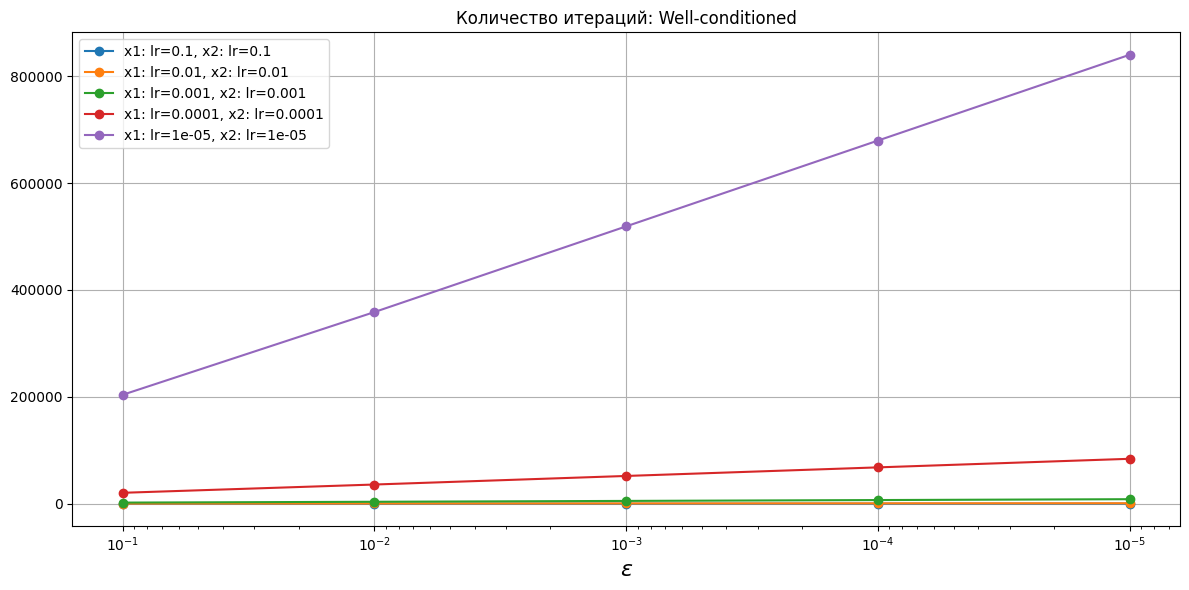

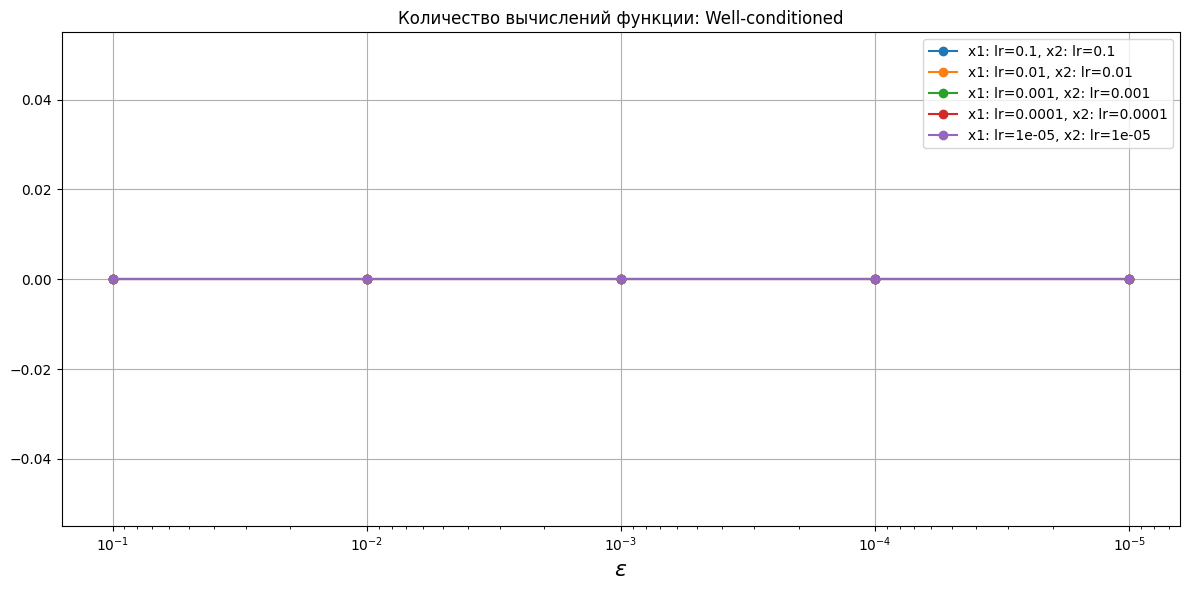

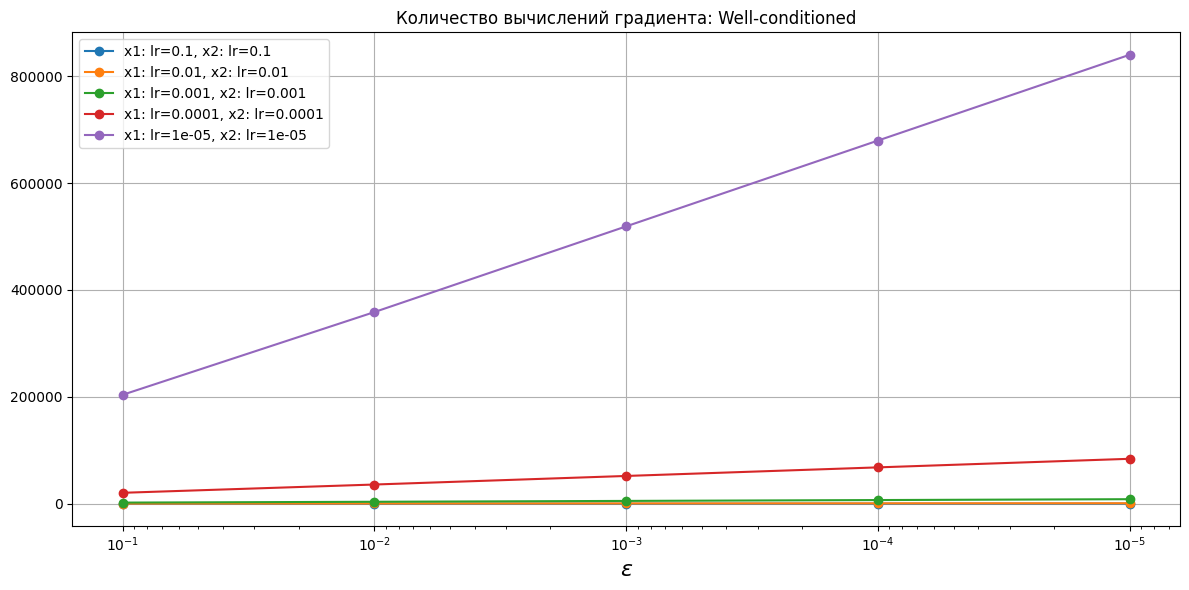

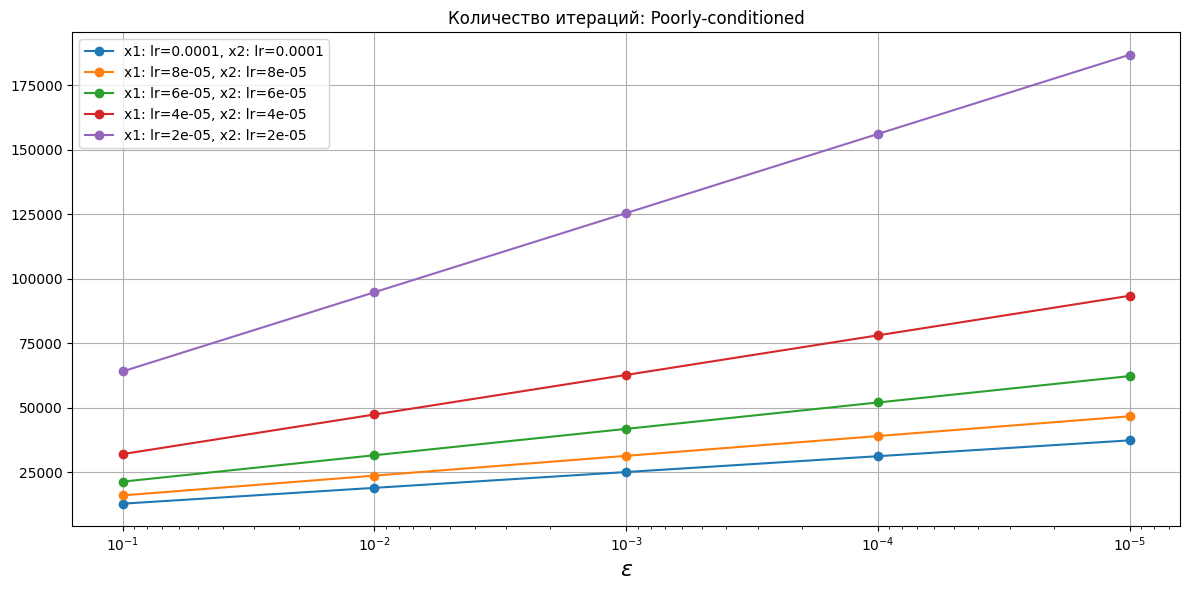

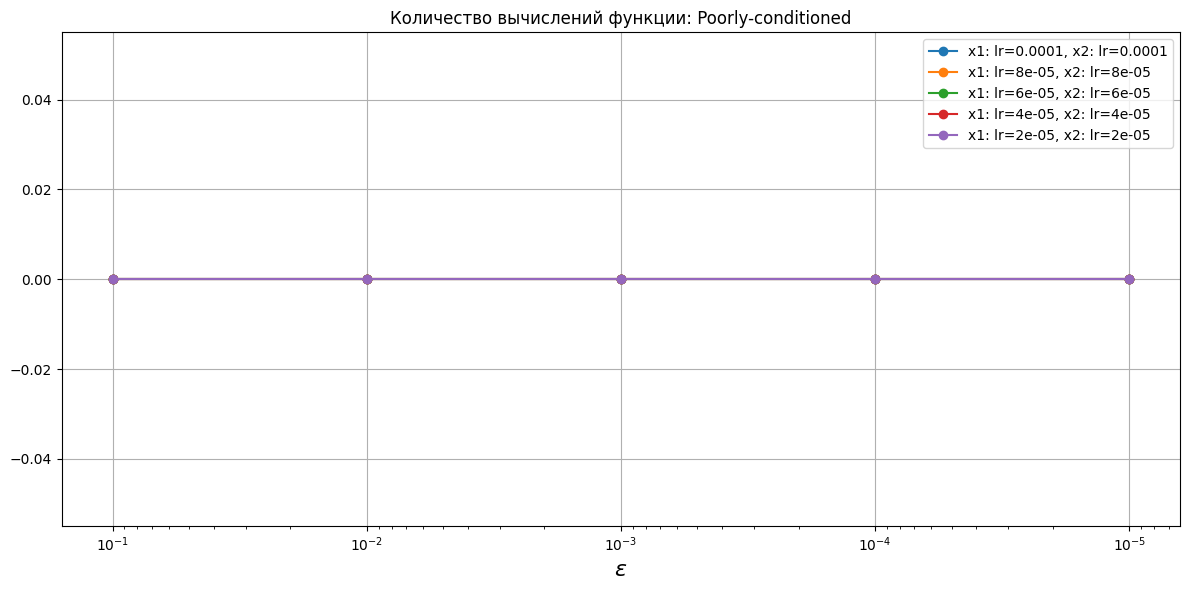

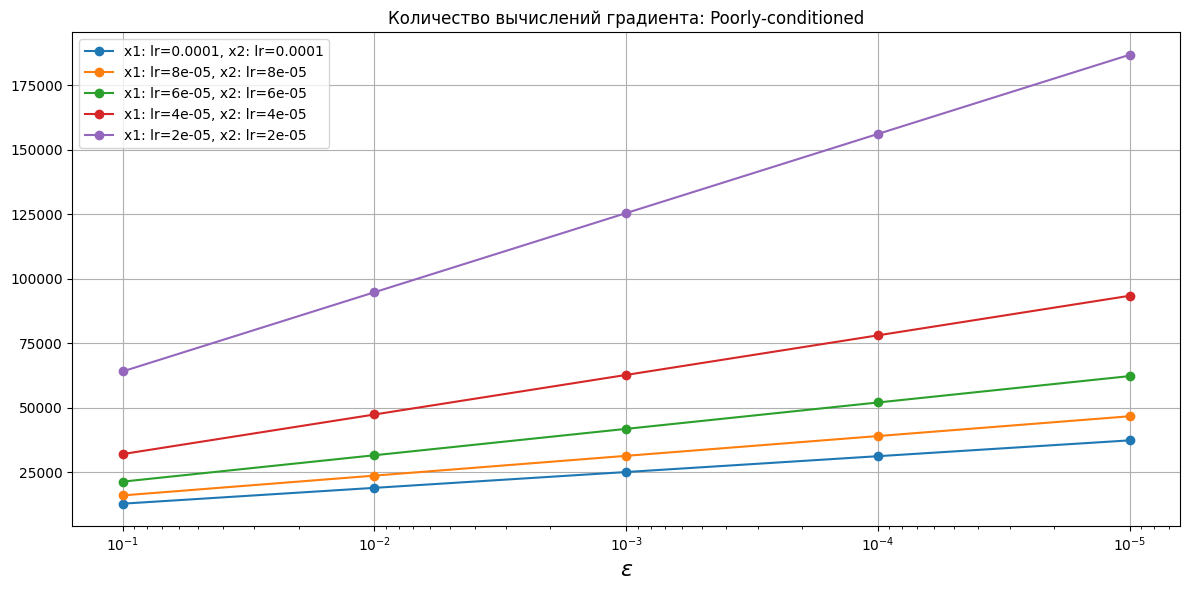

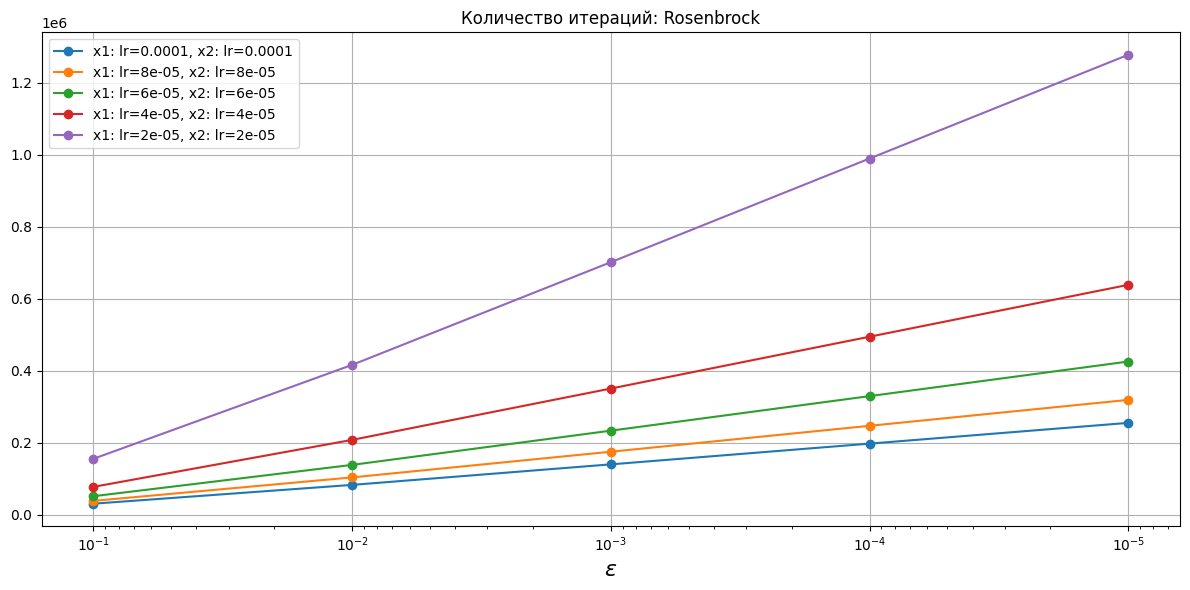

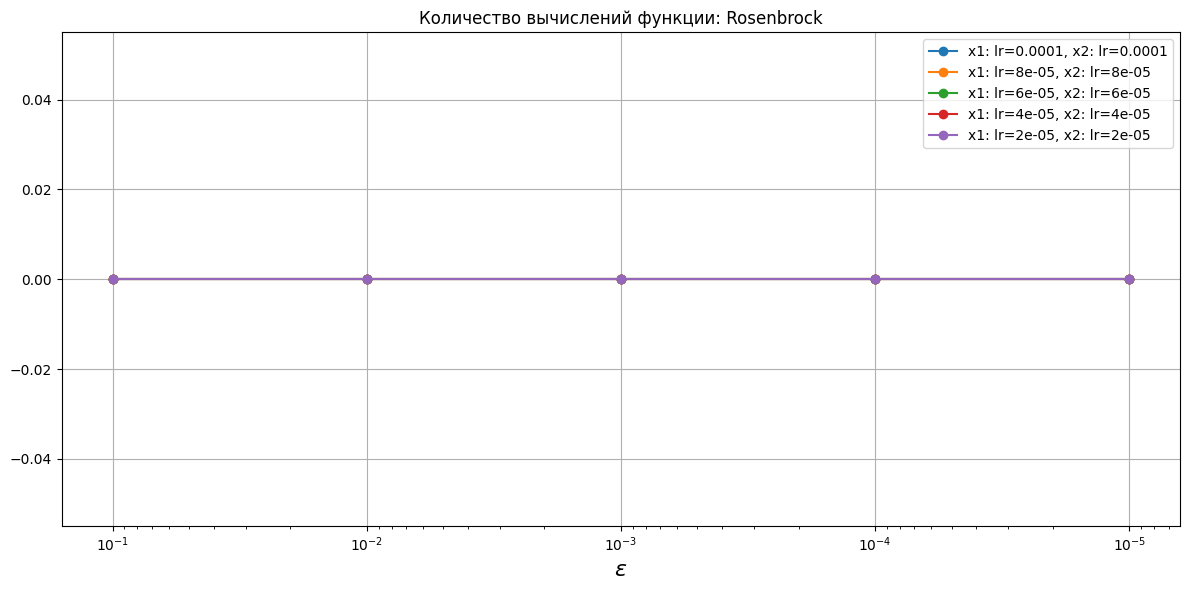

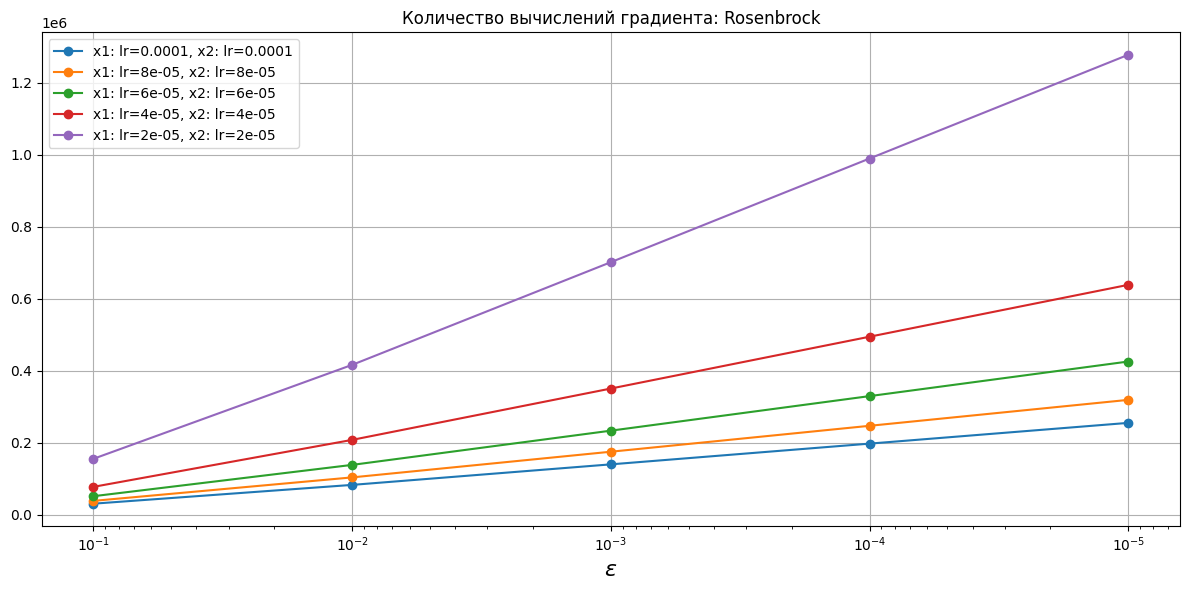

In [12]:
section_names = ['x_optim', 'iter_count', 'func_count', 'grad_count']

for ndx, lbl in enumerate(func_labels):
        for ttl, tbl, file_name in zip(titles_all[1:], tables_all[1:], section_names[1:]):
                plt.figure(figsize=user_figsize)
                for mdx in range(N_LR):
                        plt.plot(
                                tbl[ndx]['eps'],
                                tbl[ndx].iloc[:,1+mdx],
                                marker='.', markersize=user_markersize,
                                label=tbl[ndx].iloc[:,1+mdx].name)
                plt.gca().invert_xaxis()
                plt.title(ttl + ': ' + lbl)
                plt.grid()
                plt.xscale('log')
                plt.xlabel('$\epsilon$', fontsize=user_fontsize)
                plt.legend()
                plt.tight_layout()
                plt.savefig('readme_img/const_step_descent_img/' + file_name + '_' + lbl + '.png', bbox_inches='tight')
                plt.show()

## Генератор таблиц в приложения

In [13]:
from Functions.user_functions import update_readme_section

In [14]:
for tbl, ttl, section in zip(tables_all, titles_all, section_names):
    for ndx, lbl in enumerate(func_labels):
        update_readme_section(tbl[ndx], readme_path='const_step_descent.md', tbl_name=ttl + ': ' + lbl, section=section + '_' + lbl)